In [1]:
!pip install pandas --upgrade

     |████████████████████████████████| 11.3 MB 4.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [1]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 189 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 


In [2]:
from fastai.vision.all import *
from google.colab import drive

In [3]:
drive.mount('/content/gdrive', force_remount=True)
!ls '/content/'

Mounted at /content/gdrive
gdrive	sample_data


In [6]:
!ls '/content/gdrive/MyDrive/artofrallyimages'

Left  Nothing  Right


In [10]:
# Function that labels an image as its parent directory, now 
def label_func(image): return image.parent.name

In [17]:
import random
images_path = '/content/gdrive/MyDrive/artofrallyimages'
file_names = get_image_files(images_path)
random.shuffle(file_names)
print(f"Total images: {len(file_names)}")
dls = ImageDataLoaders.from_path_func(images_path, file_names, label_func)

Total images: 737


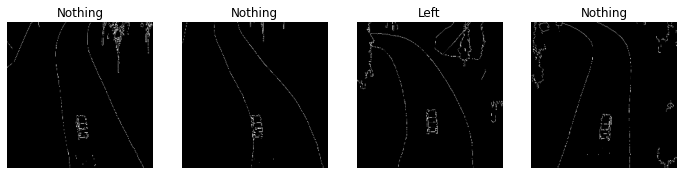

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ValueError: ignored

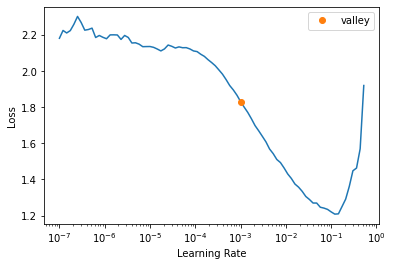

In [20]:
lr_min, lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [21]:
learn.fine_tune(2, base_lr=1.0e-02)

epoch,train_loss,valid_loss,error_rate,time
0,1.309079,1.545625,0.421769,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.635137,2.957863,0.482993,00:06
1,0.588670,1.265257,0.272109,00:05


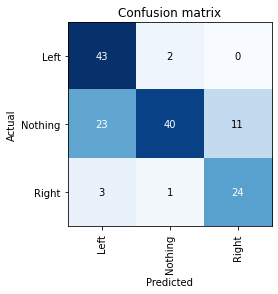

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [25]:
learn.export(fname="/content/gdrive/MyDrive/rallyai.pkl")